In [1]:
import sys
sys.path.insert(0, "..//..//..//scripts")

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from CDFClassifier import * 

from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("..//..//..//..//data//Weekly_data_tokenized.csv")

In [3]:
def create_genre(row, genre):
    if re.search(genre, row["Genre"], flags = re.I) != None:
        return 1
    else:
        return 0

df["Pop"] = df.apply(lambda row: create_genre(row, "pop"), axis = 1)
df["Rap"] = df.apply(lambda row: create_genre(row, "rap"), axis = 1)

df = df[["word", "ID", "Pop", "Rap"]]

In [4]:
np.random.seed(1)

IDs = df.ID.unique()
np.random.shuffle(IDs)

train = df[df.ID.isin(IDs[:int(.8 * len(IDs))])]
test = df[df.ID.isin(IDs[int(.8 * len(IDs)):])]

In [5]:
def grid_search(x, y, num, clf, train, test, classes, compare):
    
    grid = {}

    for n in np.linspace(x, y, num):
        tclf = clf(alpha = n, compare = compare)
        tclf.fit(train, classes)
        grid.update({n: confusion_matrix(tclf.predict(test, classes), tclf.test_Y).ravel()})

    plt.plot([i for i in grid], [(grid[i][0] + grid[i][-1]) / sum(grid[i]) for i in grid])

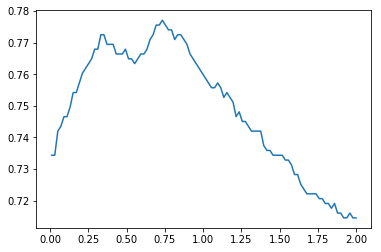

In [6]:
grid_search(0.01, 2, 100, CDFClassifier, train, test, ["Pop", "Rap"], "Mann-Whitney")